/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-7-b4ce1d46fae6>:21: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(lambda x: 1 if x > 0 else 0)


                       antecedents                   consequents  \
5387  (Breakfast Taco, Quesadilla)   (Nachos, Burrito, Soda Pop)   
5382   (Nachos, Burrito, Soda Pop)  (Breakfast Taco, Quesadilla)   
3877   (Nachos, Burrito, Soda Pop)     (Agua Fresca, Quesadilla)   
3892     (Agua Fresca, Quesadilla)   (Nachos, Burrito, Soda Pop)   
5746       (Breakfast Taco, Salsa)      (Nachos, Taco, Soda Pop)   

      antecedent support  consequent support   support  confidence      lift  \
5387            0.282028            0.162890  0.076958    0.272872  1.675193   
5382            0.162890            0.282028  0.076958    0.472452  1.675193   
3877            0.162890            0.274624  0.074265    0.455923  1.660170   
3892            0.274624            0.162890  0.074265    0.270425  1.660170   
5746            0.280906            0.171416  0.079874    0.284345  1.658804   

      representativity  leverage  conviction  zhangs_metric   jaccard  \
5387               1.0  0.031018    1

/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [8]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import os

# Load the dataset
file_path = os.path.join("/content/ignacio's_corporation_sales_data.csv")
df = pd.read_csv(file_path)

# Extract product names (removing prices) from 'Products (Name:Price)'
df['Products'] = df['Products (Name:Price)'].apply(
    lambda x: [item.split(':')[0] for item in x.split(', ')]
)

# Transform data into a transaction format
basket = df.explode('Products').groupby(['OrderID', 'Products'])['Products'] \
    .count().unstack().reset_index().fillna(0).set_index('OrderID')

# Encode quantities as 1 (purchased) or 0 (not purchased)
basket = basket.applymap(lambda x: 1 if x > 0 else 0)

# Generate frequent itemsets with a minimum support of 0.07
frequent_itemsets = apriori(basket, min_support=0.07, use_colnames=True)

# Generate association rules with a minimum lift of 1
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Sort rules by lift in descending order
rules = rules.sort_values('lift', ascending=False)

# Display the first 5 rules
print(rules.head())


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-8-f0f47dc428c1>:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(lambda x: 1 if x > 0 else 0)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


TypeError: association_rules() missing 1 required positional argument: 'num_itemsets'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


=== Method 1: Product Popularity ===
Products
Nachos               13044
Taco                 12936
Breakfast Taco       12775
Agua Fresca          12758
Breakfast Burrito    12686
Salsa                12674
Quesadilla           12400
Soda Pop             12263
Burrito              12086
Name: count, dtype: int64


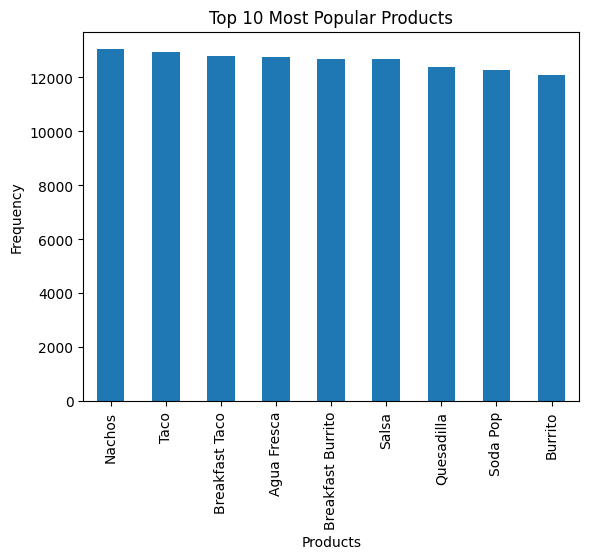


=== Method 2: Basket Size Analysis ===
count    22550.000000
mean         5.038670
std          2.580181
min          1.000000
25%          3.000000
50%          5.000000
75%          7.000000
max          9.000000
Name: Basket Size, dtype: float64


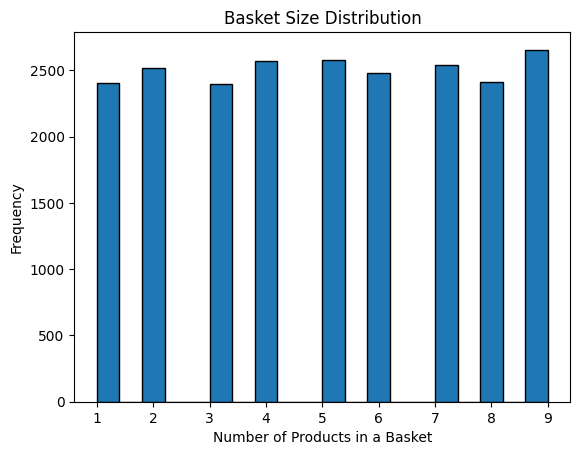


=== Method 3: Product Co-occurrence ===
Co-occurrence Matrix (Top 10 Products):
Products           Agua Fresca  Breakfast Burrito  Breakfast Taco  Burrito  \
Products                                                                     
Agua Fresca             102104              49358           50512    46484   
Breakfast Burrito        49358             101112           48332    45297   
Breakfast Taco           50512              48332          102027    48625   
Burrito                  46484              45297           48625    93204   
Nachos                   51511              50473           51989    47038   
Quesadilla               47566              47307           48077    46418   
Salsa                    48928              49130           48082    46520   
Soda Pop                 46984              45070           47335    42479   
Taco                     51355              49389           50879    47699   

Products           Nachos  Quesadilla  Salsa  Soda Pop   Tac

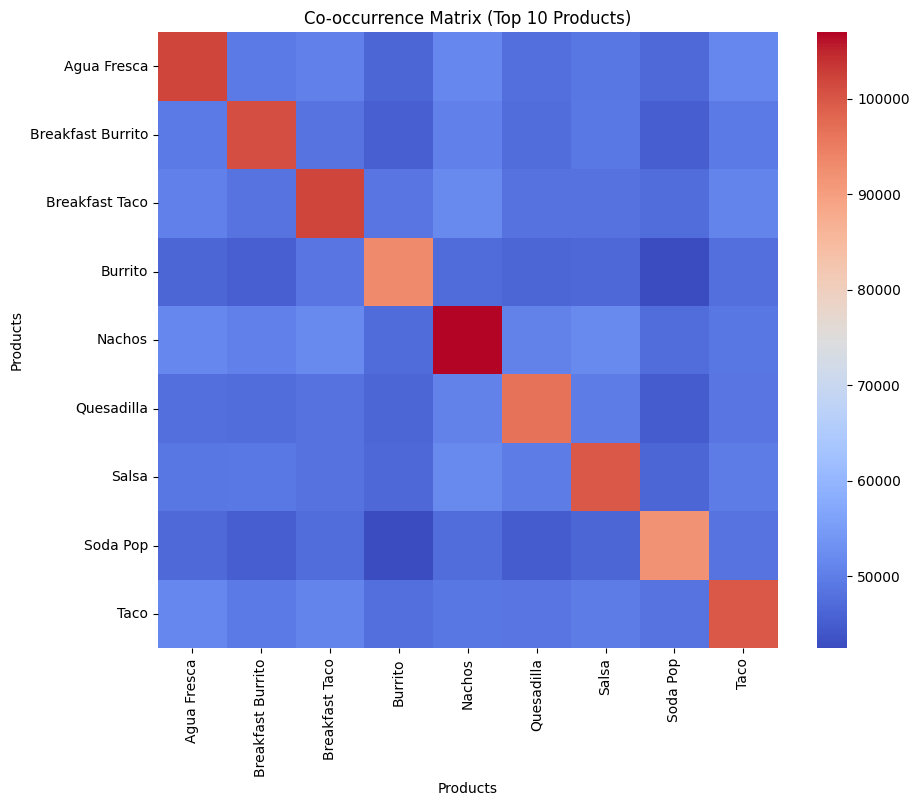


=== Method 5: Visualization ===


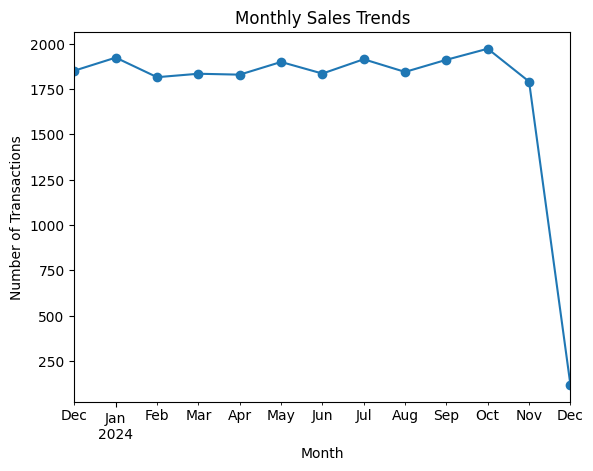

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "/content/ignacio's_corporation_sales_data.csv"  # Update with your file path
df = pd.read_csv(file_path)

# Method 1: Basic Product Popularity Analysis
print("=== Method 1: Product Popularity ===")
# Extract product names
df['Products'] = df['Products (Name:Price)'].apply(
    lambda x: [item.split(':')[0] for item in x.split(', ')]
)
# Count product frequency
product_counts = df.explode('Products')['Products'].value_counts()
print(product_counts.head(10))

# Plot the top 10 products
product_counts.head(10).plot(kind='bar')
plt.title('Top 10 Most Popular Products')
plt.ylabel('Frequency')
plt.xlabel('Products')
plt.show()

# Method 2: Basket Size Analysis
print("\n=== Method 2: Basket Size Analysis ===")
# Calculate basket size
df['Basket Size'] = df['Products'].apply(len)
basket_size_stats = df['Basket Size'].describe()
print(basket_size_stats)

# Plot basket size distribution
df['Basket Size'].plot(kind='hist', bins=20, edgecolor='black')
plt.title('Basket Size Distribution')
plt.xlabel('Number of Products in a Basket')
plt.ylabel('Frequency')
plt.show()

# Method 3: Product Co-occurrence Matrix
print("\n=== Method 3: Product Co-occurrence ===")
# Transform data for a co-occurrence matrix
basket = df.explode('Products').groupby(['OrderID', 'Products'])['Products'] \
    .count().unstack().fillna(0).astype(int)

# Compute co-occurrence matrix
co_occurrence = basket.T.dot(basket)
print("Co-occurrence Matrix (Top 10 Products):")
print(co_occurrence.head(10))

# Visualize co-occurrence matrix as a heatmap
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(co_occurrence.head(10), annot=False, cmap="coolwarm")
plt.title('Co-occurrence Matrix (Top 10 Products)')
plt.show()

# Method 5: Visualization for Trends
print("\n=== Method 5: Visualization ===")
# Monthly sales trends (assuming 'Date' column exists and is in YYYY-MM-DD format)
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
    df['Month'] = df['Date'].dt.to_period('M')
    monthly_sales = df.groupby('Month').size()

    # Plot monthly sales trend
    monthly_sales.plot(kind='line', marker='o')
    plt.title('Monthly Sales Trends')
    plt.ylabel('Number of Transactions')
    plt.xlabel('Month')
    plt.show()
else:
    print("No 'Date' column found for trend analysis.")
